In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'data/train'
val_dir = 'data/test'
batch_size = 64
num_epoch = 50

In [3]:
def plot_bar_graph(label, no_images, title):
    index = np.arange(len(label))
    plt.bar(index, no_images)
    plt.xlabel('Emotions')
    plt.ylabel('No of Images')
    plt.xticks(index, label, rotation=30)
    plt.title(title)
    plt.show()

In [4]:
from os import listdir
labels = listdir(train_dir)

In [5]:
labels

['happy', 'sad', 'fearful', 'surprised', 'angry', 'neutral', 'disgusted']

In [6]:
images_distribution_train = [len(listdir(train_dir+'/'+label)) for label in labels]
images_distribution_val = [len(listdir(val_dir+'/'+label)) for label in labels]

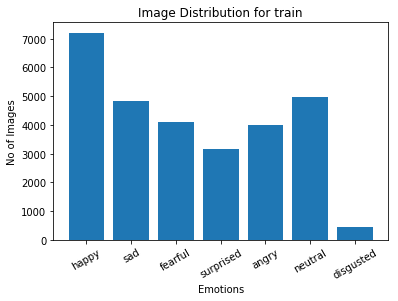

In [7]:
plot_bar_graph(labels, images_distribution_train, 'Image Distribution for train')

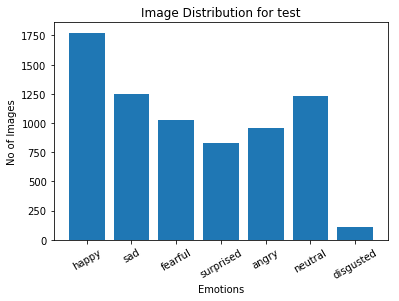

In [8]:

plot_bar_graph(labels, images_distribution_val, 'Image Distribution for test')

In [9]:
num_train = sum(images_distribution_train)
num_val = sum(images_distribution_val)

In [10]:
num_train

28709

In [11]:
num_val

7178

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

W0418 22:54:35.819401 139756378666816 deprecation.py:506] From /home/rohangoyal2014/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

In [23]:
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

Epoch 1/50
448/448 [==============================] - 310s 692ms/step - loss: 1.7945 - acc: 0.2655 - val_loss: 1.6971 - val_acc: 0.3489
Epoch 2/50
448/448 [==============================] - 339s 757ms/step - loss: 1.6274 - acc: 0.3697 - val_loss: 1.5425 - val_acc: 0.4110
Epoch 3/50
448/448 [==============================] - 300s 669ms/step - loss: 1.5384 - acc: 0.4080 - val_loss: 1.4775 - val_acc: 0.4427
Epoch 4/50
448/448 [==============================] - 257s 574ms/step - loss: 1.4688 - acc: 0.4373 - val_loss: 1.4185 - val_acc: 0.4602
Epoch 5/50
448/448 [==============================] - 270s 603ms/step - loss: 1.4112 - acc: 0.4615 - val_loss: 1.3641 - val_acc: 0.4879
Epoch 6/50
448/448 [==============================] - 256s 572ms/step - loss: 1.3566 - acc: 0.4837 - val_loss: 1.3160 - val_acc: 0.4996
Epoch 7/50
448/448 [==============================] - 254s 566ms/step - loss: 1.3146 - acc: 0.5056 - val_loss: 1.2859 - val_acc: 0.5073
Epoch 8/50
448/448 [============================

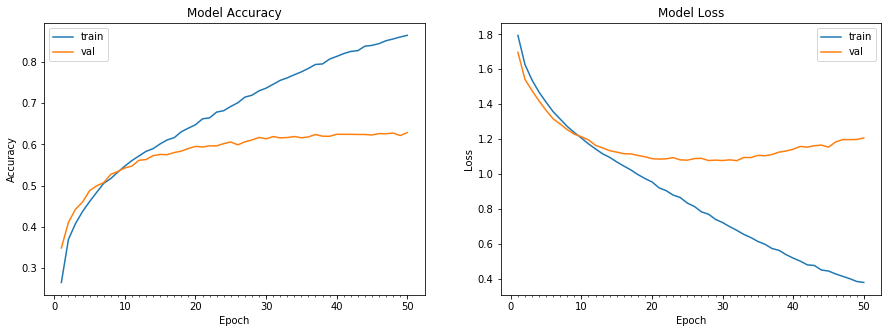

In [25]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()
plot_model_history(model_info)
model.save_weights('model.h5')

In [40]:
Y_pred = model.predict_generator(validation_generator, num_val // batch_size+1)

In [41]:
y_pred = np.argmax(Y_pred, axis=1)

In [42]:
validation_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(validation_generator.classes, y_pred))

[[128  15 111 256 186 153 109]
 [ 16   0  13  24  26  14  18]
 [134   9 116 272 211 163 119]
 [220  24 210 431 352 286 251]
 [159  15 125 310 238 222 164]
 [176   6 155 348 217 215 130]
 [118   9 105 194 168 129 108]]


In [44]:
target_names = ["Angry", "Disgusted", "Fearful", "Happy", "Neutral", "Sad", "Surprised"]

In [45]:
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Angry       0.13      0.13      0.13       958
   Disgusted       0.00      0.00      0.00       111
     Fearful       0.14      0.11      0.12      1024
       Happy       0.23      0.24      0.24      1774
     Neutral       0.17      0.19      0.18      1233
         Sad       0.18      0.17      0.18      1247
   Surprised       0.12      0.13      0.12       831

   micro avg       0.17      0.17      0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [46]:
cm = confusion_matrix(validation_generator.classes, y_pred)

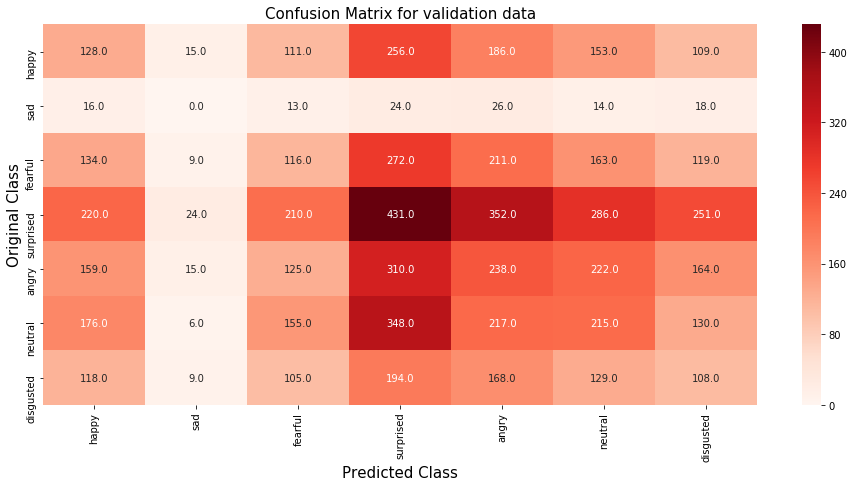

In [47]:
import seaborn as sns
plt.figure(figsize=(16,7))
sns.heatmap(cm, cmap = plt.get_cmap('Reds'), annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for validation data", fontsize = 15)
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Original Class', fontsize = 15)
plt.tick_params(labelsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [48]:
Y_pred = model.predict_generator(train_generator, num_train // batch_size+1)

In [50]:
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(train_generator.classes, y_pred)

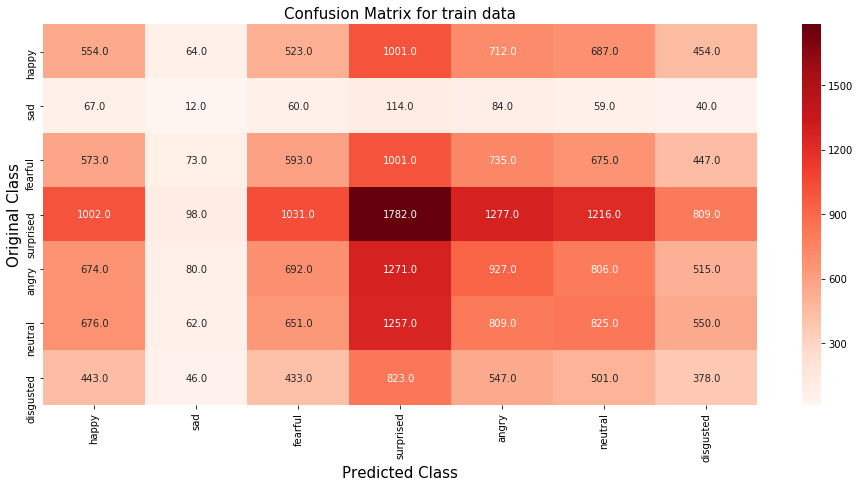

In [51]:
plt.figure(figsize=(16,7))
sns.heatmap(cm, cmap = plt.get_cmap('Reds'), annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for train data", fontsize = 15)
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Original Class', fontsize = 15)
plt.tick_params(labelsize = 10)
plt.xticks(rotation = 90)
plt.show()